In [1]:
import numpy as np
import sys
import pandas as pd
from matplotlib import pyplot as plt
sys.path.append('/home/cayjobla/Desktop/Research/delay-optimizer')
from DelayEffects.Analyzer import Analyzer

In [2]:
# Initialize
loss_name = 'Zakharov'
zak2d = Analyzer(2, loss_name)
zak10d = Analyzer(10, loss_name)
zak100d = Analyzer(100, loss_name)
zak1000d = Analyzer(1000, loss_name)
zak10000d = Analyzer(10000, loss_name)

#  2 Dimensional Grid Loss Test

### Undelayed Optimal Parameters Test

C:\Users\cayde\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


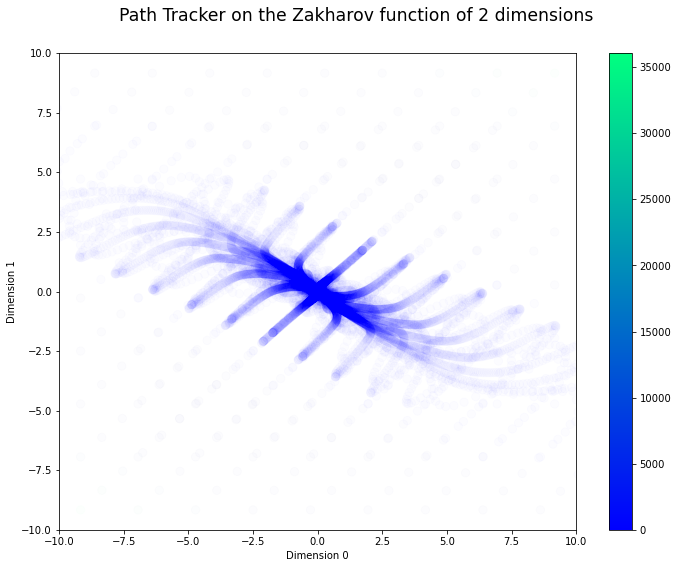

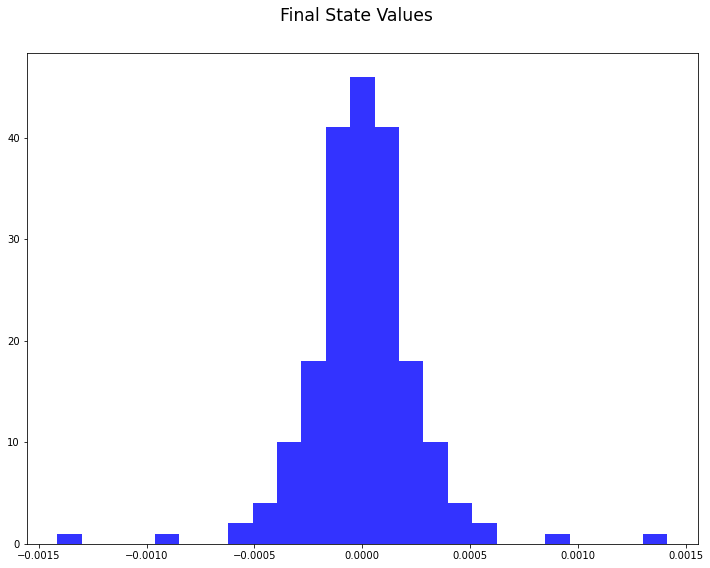

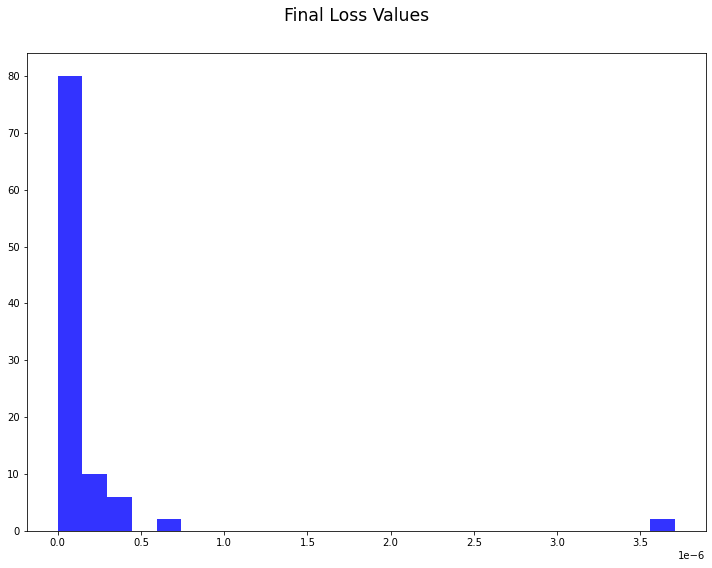

Minimum Loss: 4.2815562207746403e-10
Mean Loss: 1.6859851205367488e-07
Median Loss: 4.056858920137986e-08


In [15]:
plots = [(False, 'path', 'loss'), (False, 'finals', 'state'), (False, 'finals', 'loss')]
zak2d.optimize(10, 'grid', False, plots, range_grid=[-10.,10.], clear_data=True)

### Delayed Optimal Parameters Test

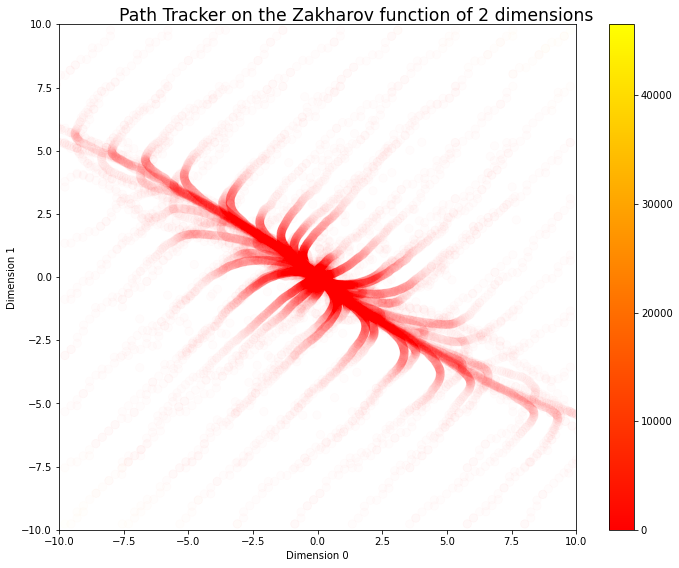

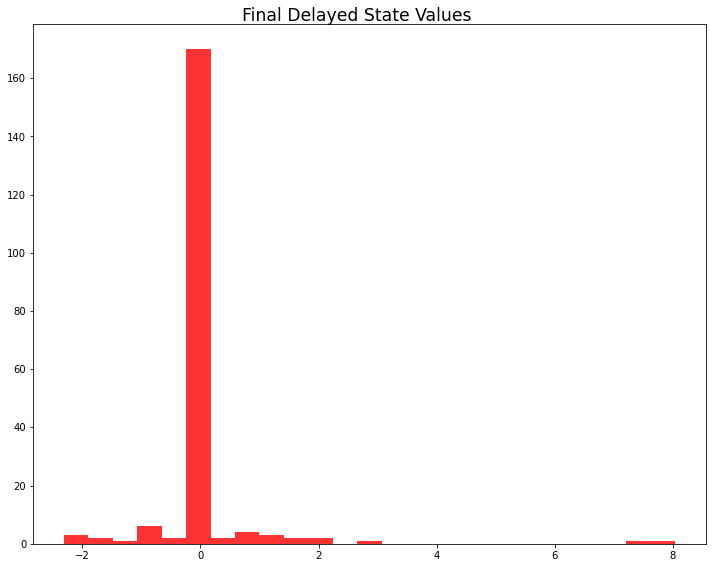

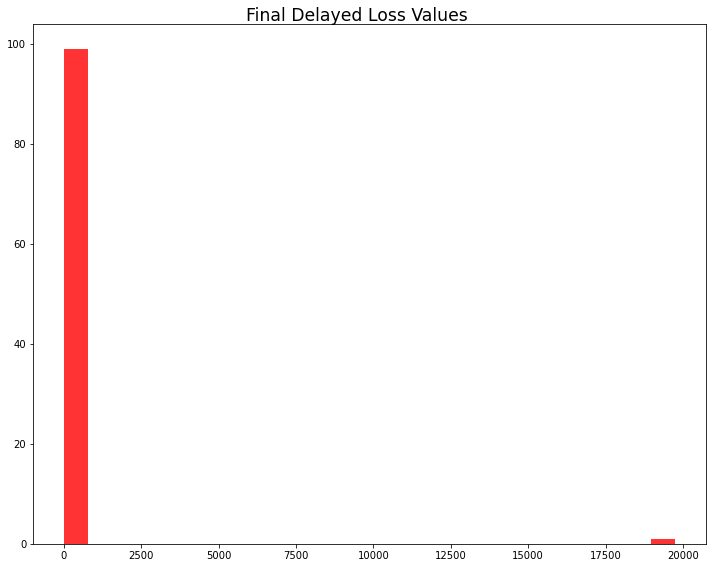

Minimum Delayed Loss: 5.136855268517966e-10
Mean Delayed Loss: 197.95269372129803
Median Delayed Loss: 1.9239474277494803e-06


In [6]:
plots = [(True, 'path', 'loss'), (True, 'finals', 'state'), (True, 'finals', 'loss')]
zak2d.optimize(10, 'grid', True, plots, range_grid=[-10.,10.], clear_data=True)

# 1000 Dimensions Test

In [9]:
plots = [('both', 'path', 'loss'), ('both', 'finals', 'state'), ('both', 'finals', 'loss')]

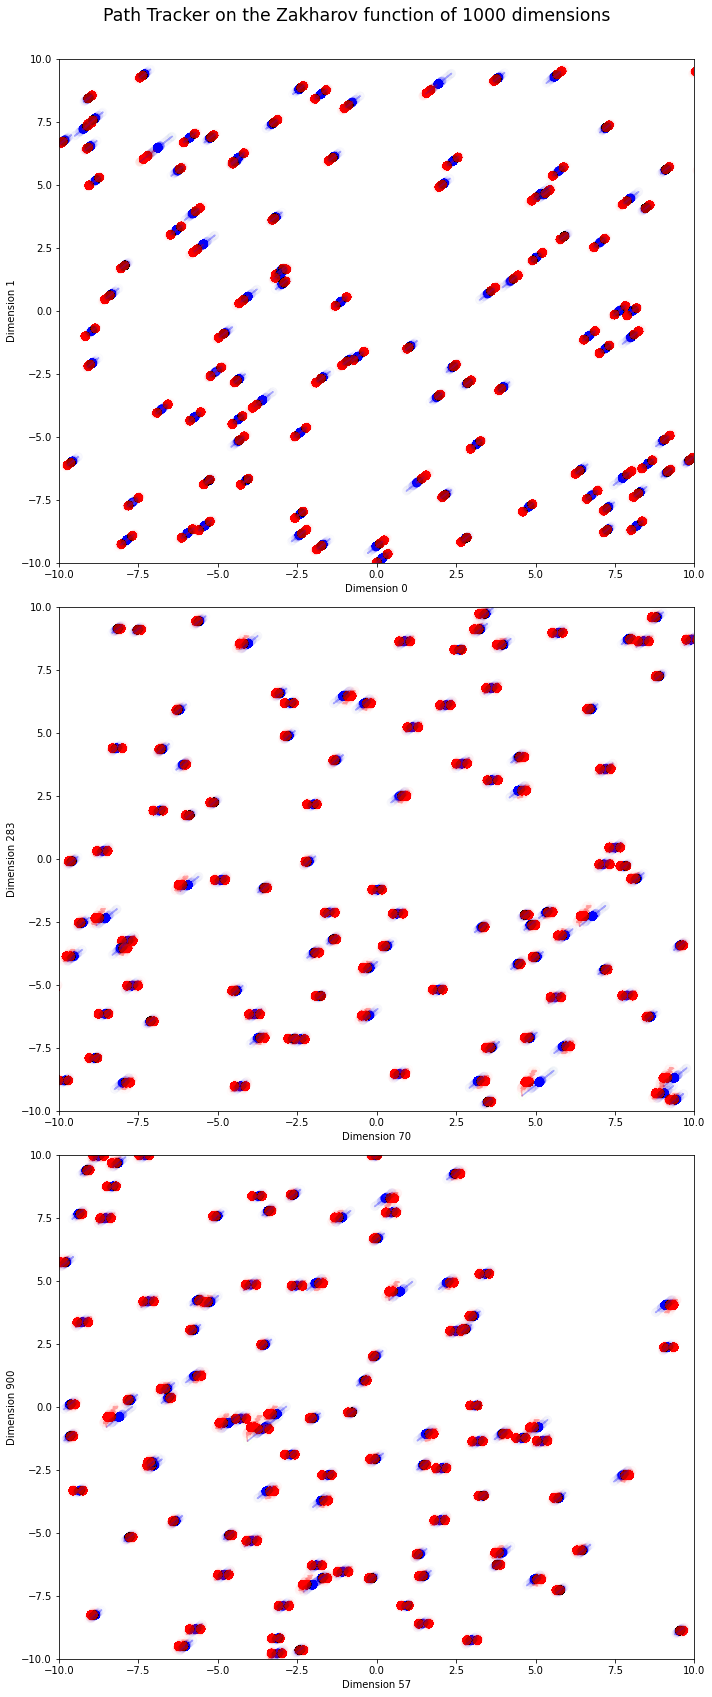

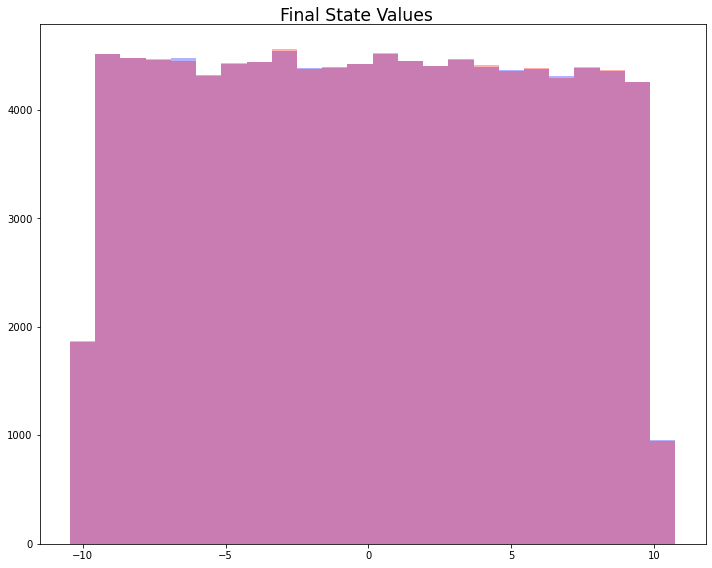

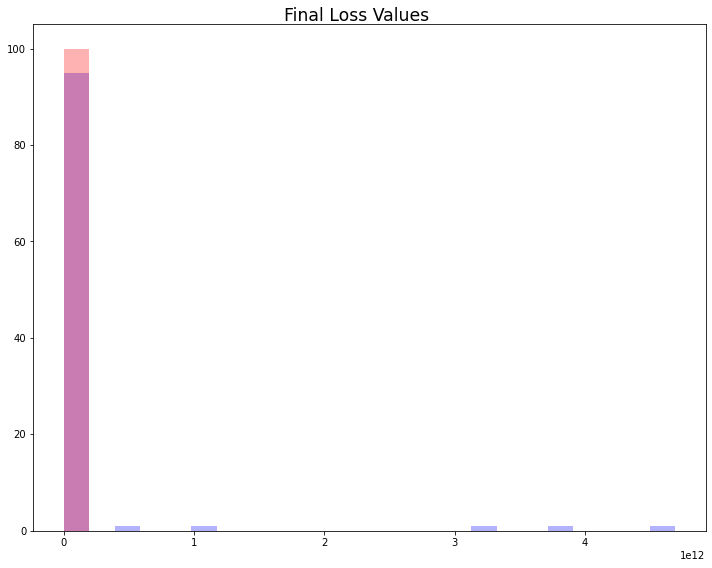

Minimum Loss: 35948.375571372664
Mean Loss: 137934671180.32
Median Loss: 86038659.0092532
Minimum Delayed Loss: 31861.426526604126
Mean Delayed Loss: 1061891877.8646468
Median Delayed Loss: 184604172.16323477


In [10]:
D_s = np.zeros(1000,dtype=int)
D_s[0:100] = 1
D = [D_s]
zak1000d.optimize(100, 'random', 'both', plots, time_plot=True, plot_dims=[(0,1),(70,283),(57,900)], colorbar=False, random=False, D=D)

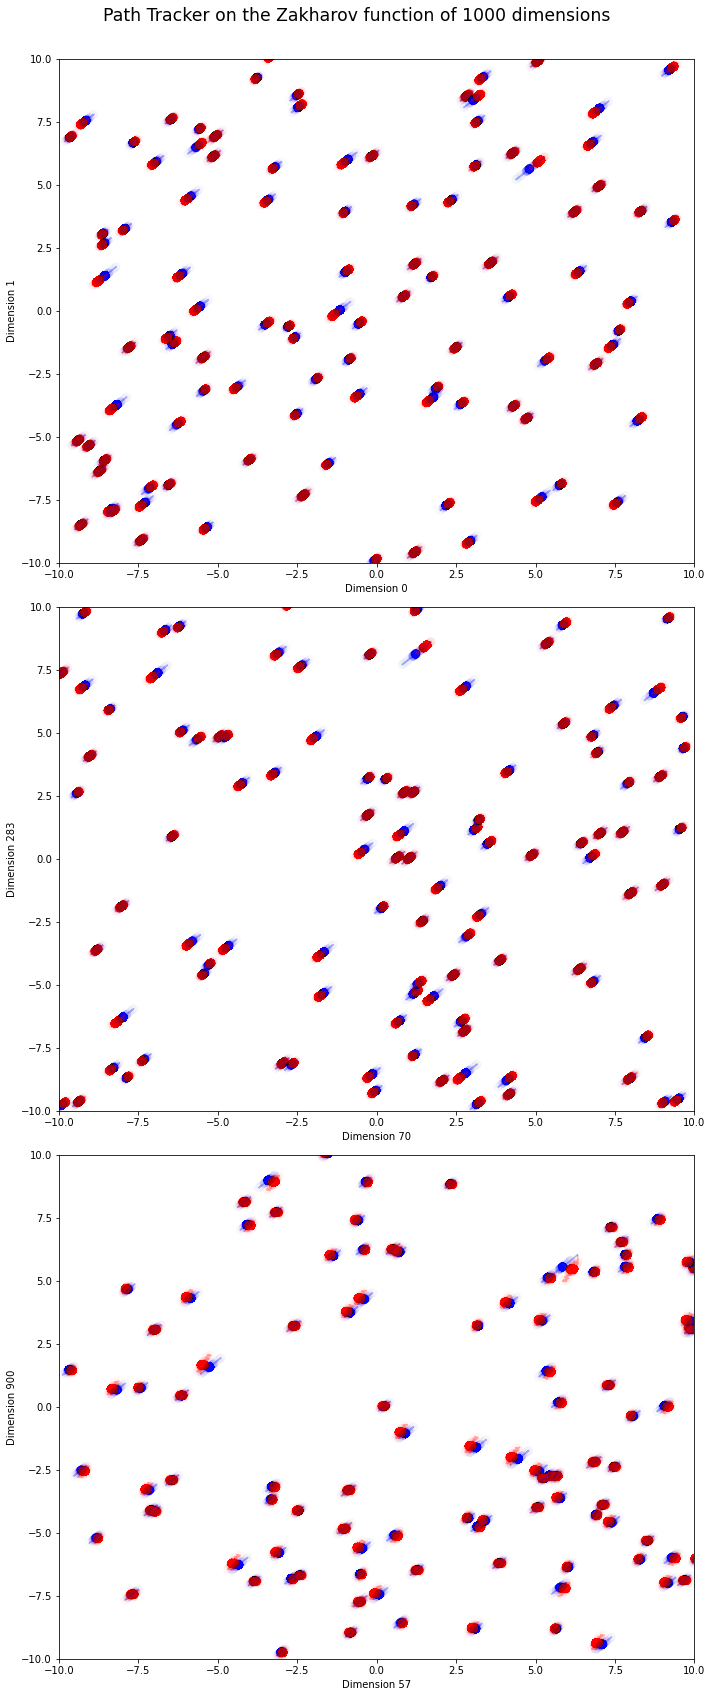

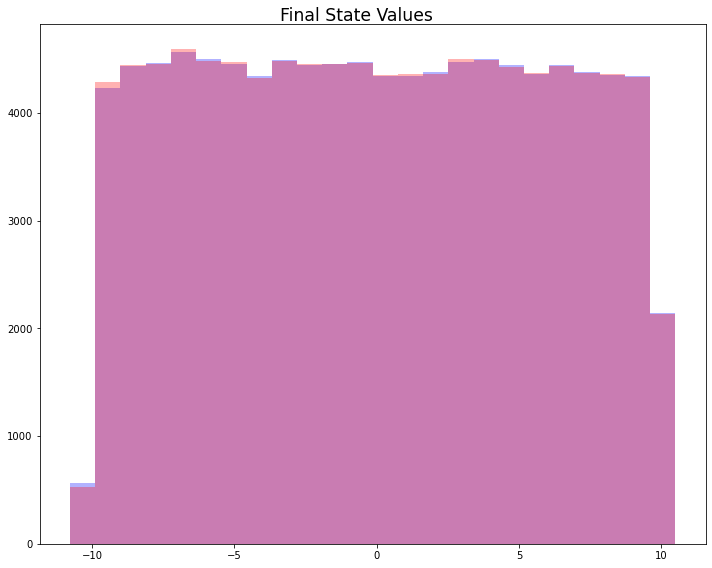

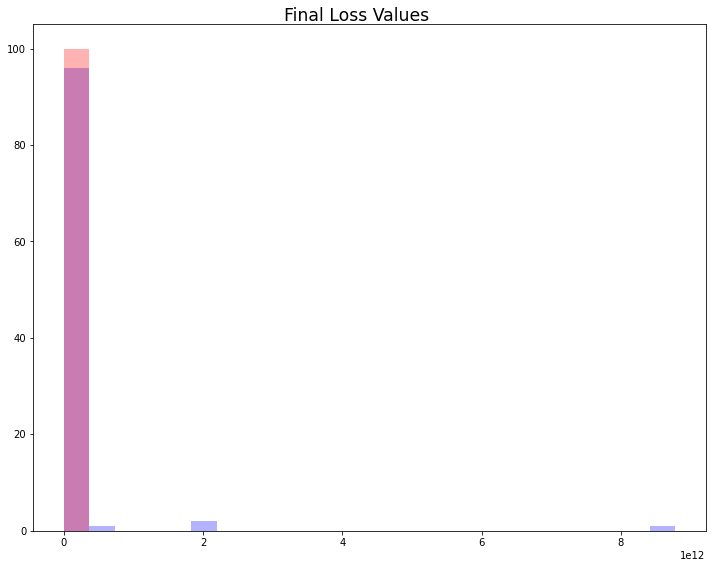

Minimum Loss: 104372.67831742702
Mean Loss: 143909642553.6542
Median Loss: 80822291.3811296
Minimum Delayed Loss: 1440740.8777297027
Mean Delayed Loss: 1297823892.6590474
Median Delayed Loss: 158402465.15986323


In [11]:
D_s = np.zeros(1000,dtype=int)
D_s[0:500] = 1
D = [D_s]
zak1000d.optimize(100, 'random', 'both', plots, time_plot=True, plot_dims=[(0,1),(70,283),(57,900)], colorbar=False, random=False, D=D)

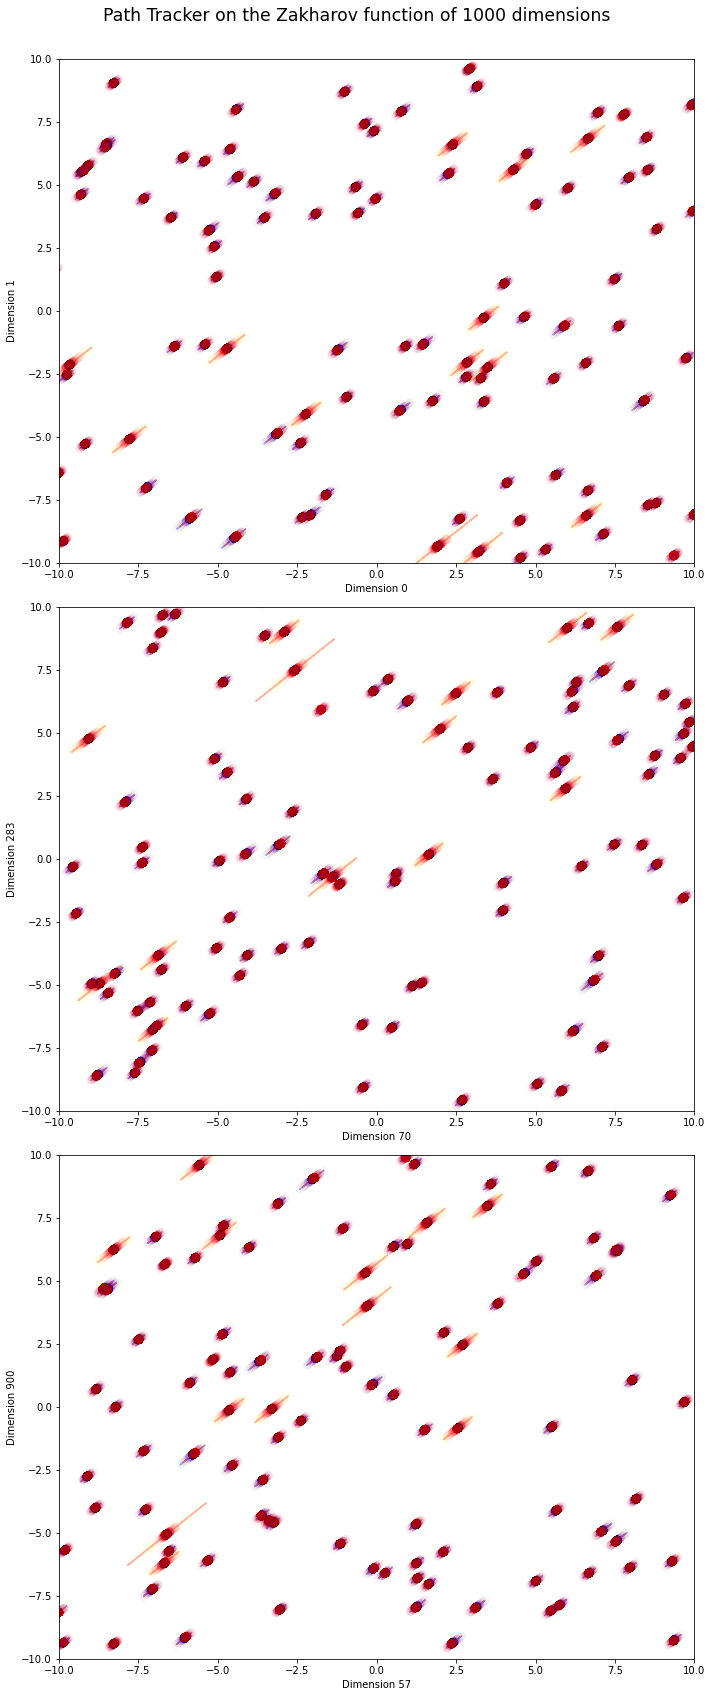

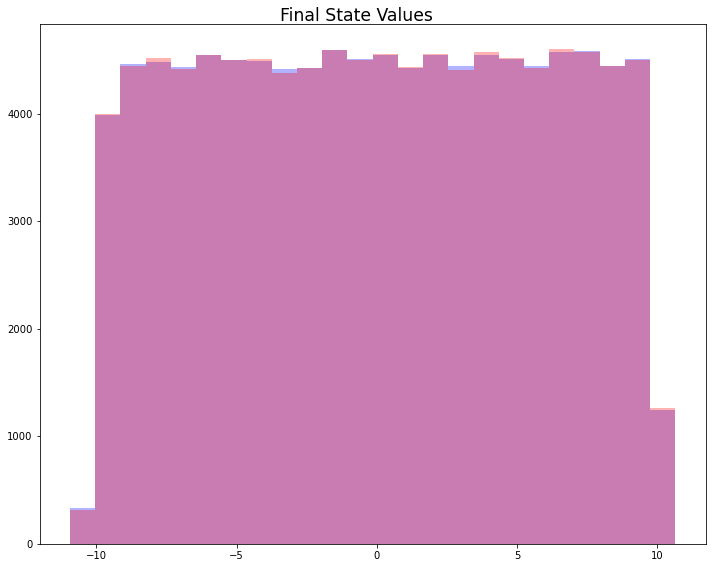

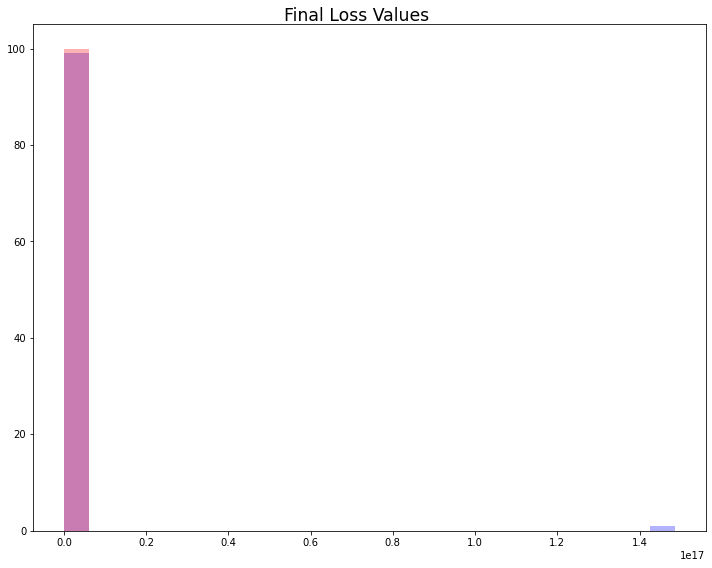

Minimum Loss: 62628.588686238734
Mean Loss: 1486340470980757.5
Median Loss: 81736929.924649
Minimum Delayed Loss: 33687474.96387138
Mean Delayed Loss: 63435766209.64988
Median Delayed Loss: 418687591.5110263


In [12]:
D_s = np.zeros(1000,dtype=int)
D_s[:950] = 1
D = [D_s]
zak1000d.optimize(100, 'random', 'both', plots, time_plot=True, plot_dims=[(0,1),(70,283),(57,900)], colorbar=False, random=False, D=D)

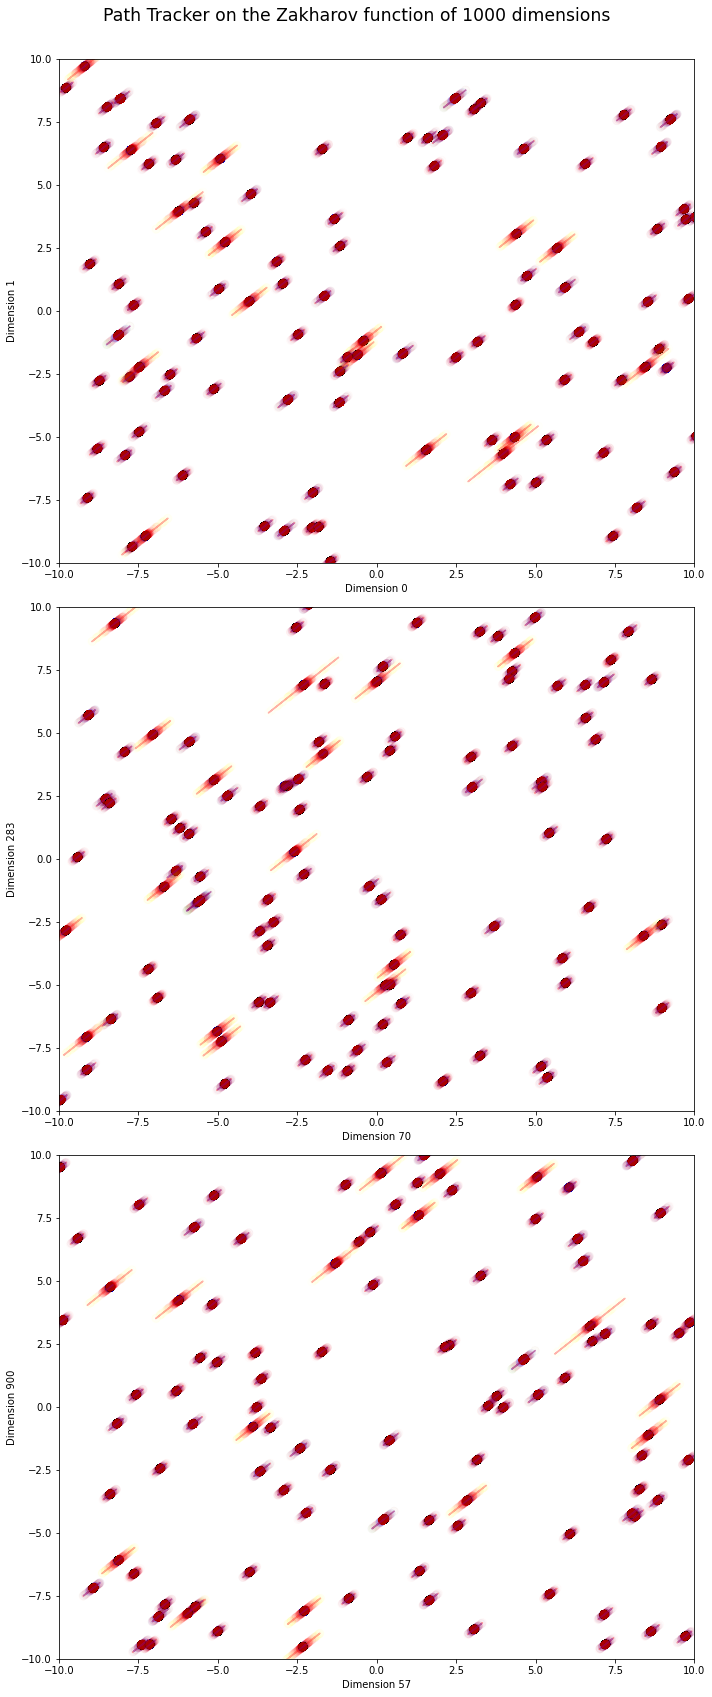

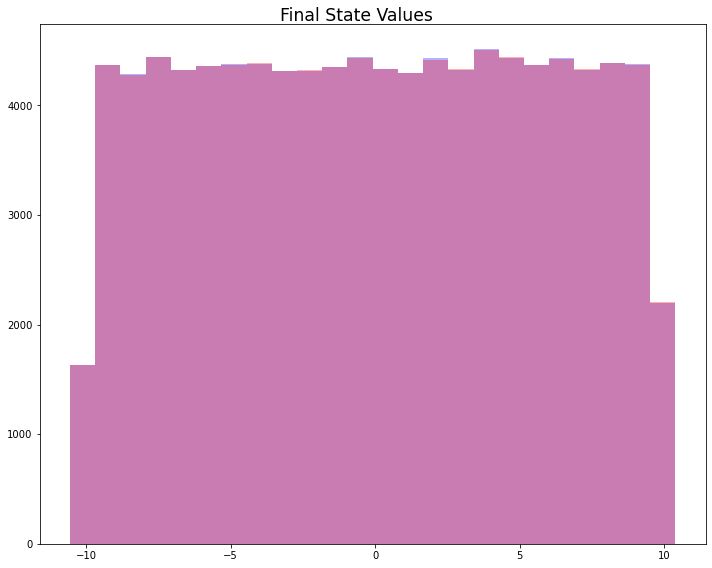

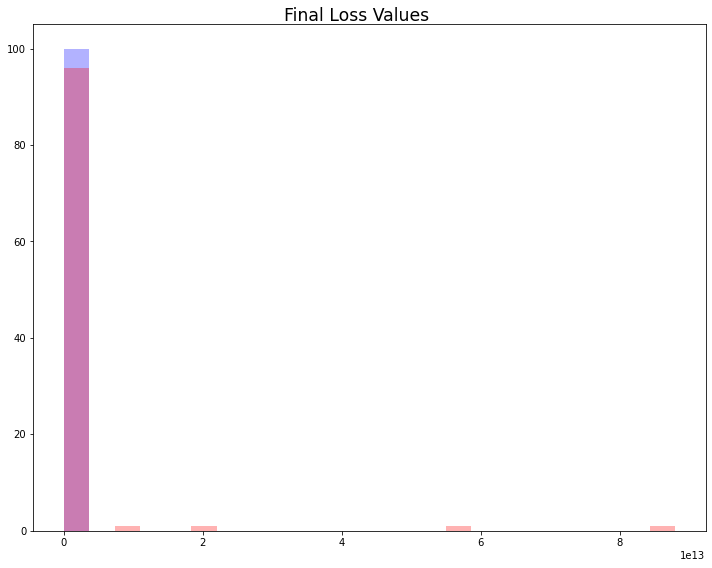

Minimum Loss: 5860799.435107303
Mean Loss: 35528870991.16592
Median Loss: 81340726.7240769
Minimum Delayed Loss: 181603572.53369233
Mean Delayed Loss: 1848181624189.054
Median Delayed Loss: 1754967860.8619733


In [13]:
D_s = np.ones(1000,dtype=int)
D = [D_s]
zak1000d.optimize(100, 'random', 'both', plots, time_plot=True, plot_dims=[(0,1),(70,283),(57,900)], colorbar=False, random=False, D=D)

# Basins of Attraction (2d)

In [5]:
plots = [('both', 'basin', 'loss'),('both', 'basin', 'iters')]
zak2d.optimize(100, 'grid', 'both', plots, contour_plot=True)

KeyboardInterrupt: 

In [ ]:
plots = [('both', 'basin', 'loss'),('both', 'basin', 'iters')]
zak2d.optimize(100, 'grid', 'both', plots, contour_plot=True)

In [5]:
zak2d.initialize_points(100, 'grid')
zak2d.calculate_save_values('both', 1, 1000, 2000, break_opt=True)

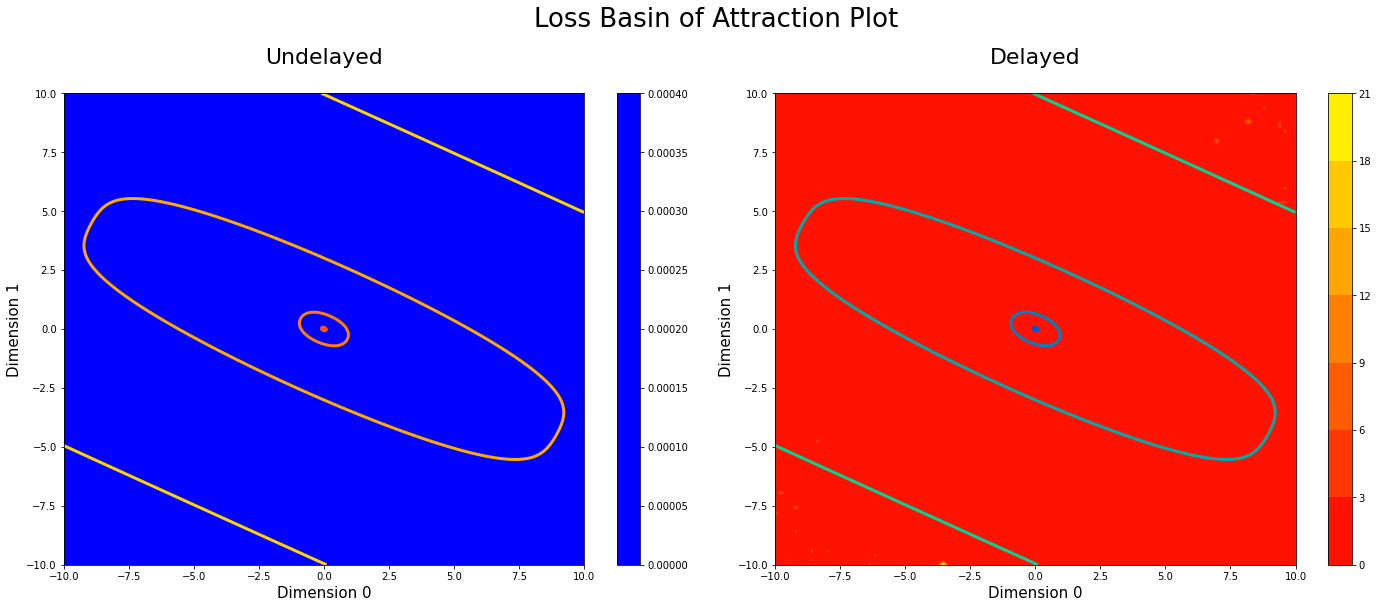

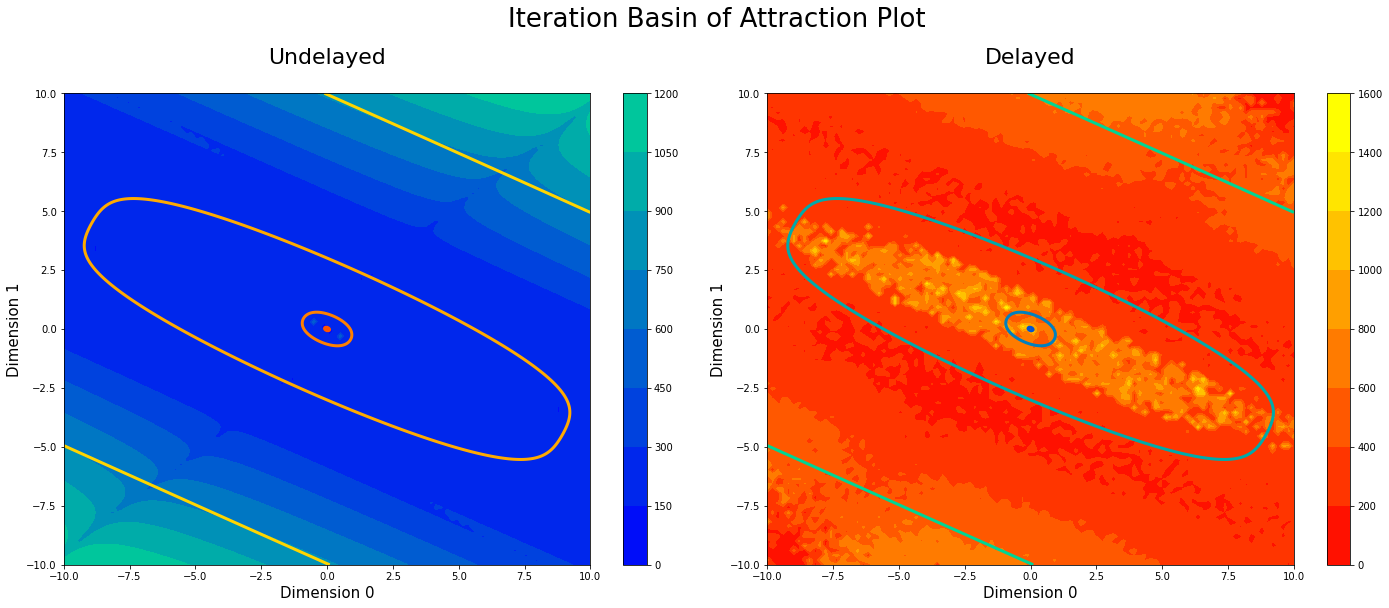

In [6]:
plots = [('both','basin','loss'),('both','basin','iters')]
zak2d.plot_list(plots, contour_plot=True)

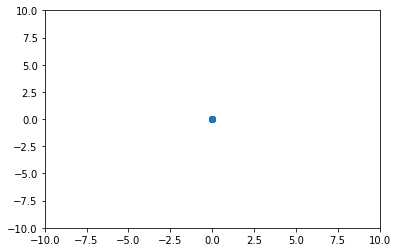

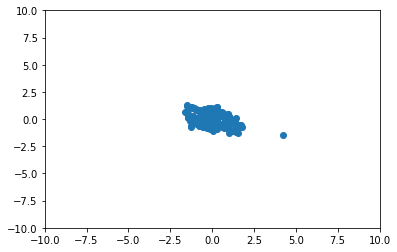

In [20]:
points = np.array(zak2d.final_states)[zak2d.conv]
plt.scatter(points[:,0], points[:,1])
plt.xlim(zak2d.range_grid)
plt.ylim(zak2d.range_grid)
plt.show()

points = np.array(zak2d.del_final_states)[zak2d.del_conv]
plt.scatter(points[:,0], points[:,1])
plt.xlim(zak2d.range_grid)
plt.ylim(zak2d.range_grid)
plt.show()

# Chaotic System test

In [19]:
def chaos_test(analyzer, eps=1e-8, max_L=1, given=None, num_delays=1000):
    # Initialize
    n = analyzer.n
    low, high = analyzer.range_grid

    # Set or unpack initial values
    if given is None:
        x_init = np.random.uniform(low, high, size=n)
        x_init_err = np.ones(n)*eps + x_init
    else:
        x_init, x_init_err = given

    # Find paths constant
    analyzer.optimize(1, 'given', True, plots=[[True, 'path', 'loss']], points=[x_init, x_init_err], 
                      max_L=max_L, D=[np.ones(n, dtype=int)], random=False, time_plot=True, 
                      clear_data=False, num_delays=num_delays, break_opt=False)

    # Plot the error over time
    fig = plt.figure(figsize=(10,8))
    x1 = analyzer.del_time_series[0]
    x2 = analyzer.del_time_series[1]
    plt.semilogy(np.linalg.norm(x1 - x2, axis=1))
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.title("Error of closely spaced points over time")
    plt.show()
    
    analyzer.clear()

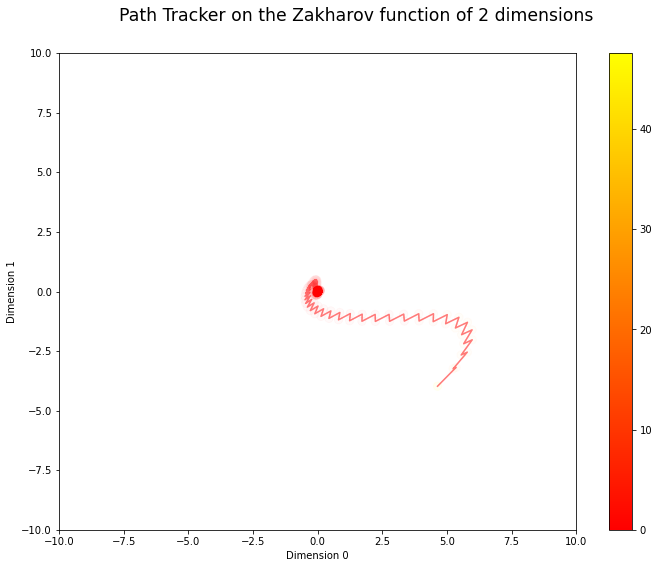

Minimum Delayed Loss: 1.1157706272135431e-63
Mean Delayed Loss: 1.1157775523724696e-63
Median Delayed Loss: 1.1157775523724696e-63


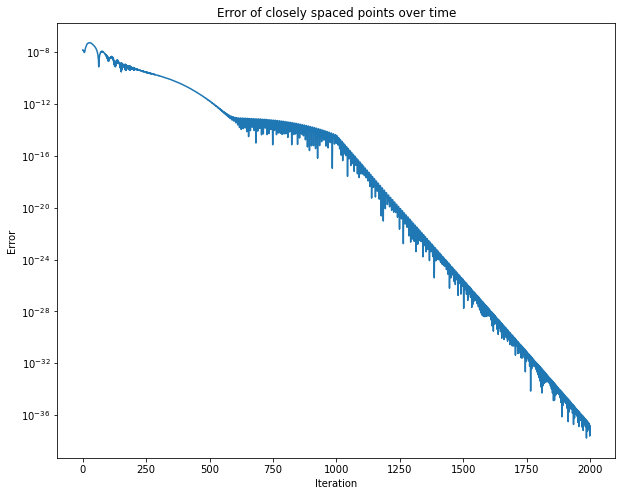

In [20]:
chaos_test(zak2d)

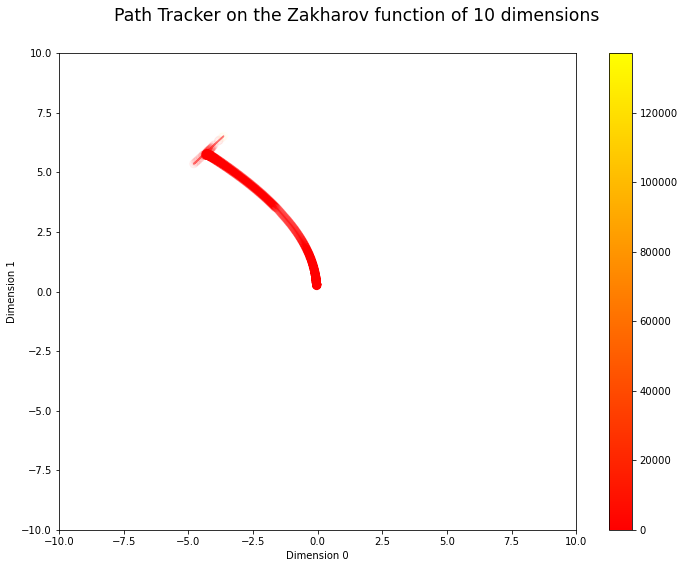

Minimum Delayed Loss: 33.27743353788207
Mean Delayed Loss: 33.277434259394305
Median Delayed Loss: 33.277434259394305


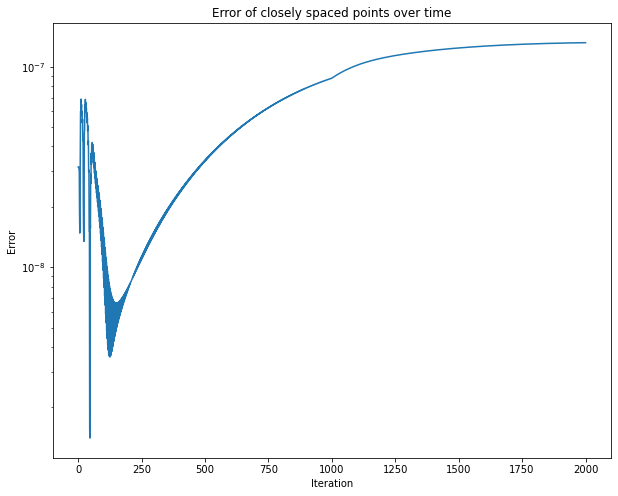

In [21]:
chaos_test(zak10d)

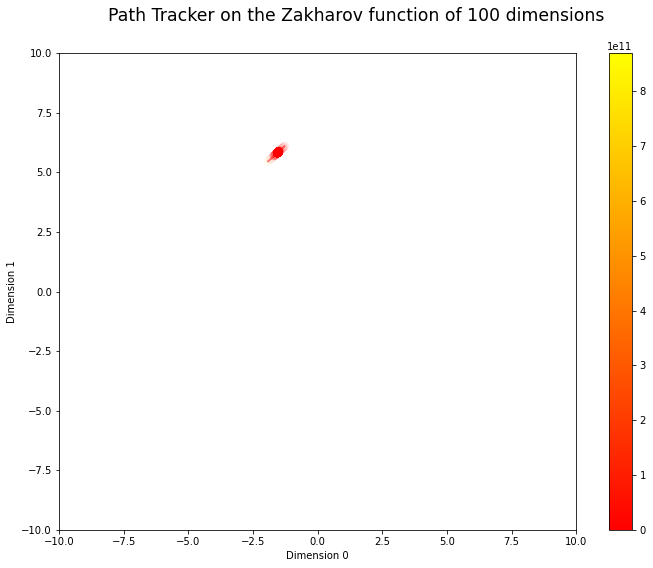

Minimum Delayed Loss: 3264.9747978195614
Mean Delayed Loss: 3264.9747987364462
Median Delayed Loss: 3264.9747987364462


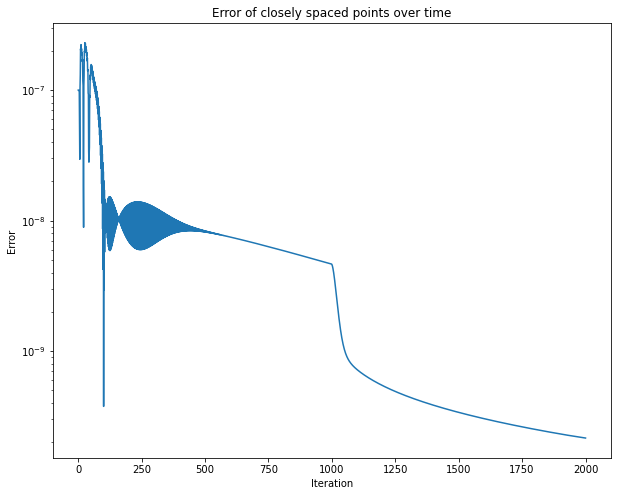

In [22]:
chaos_test(zak100d)

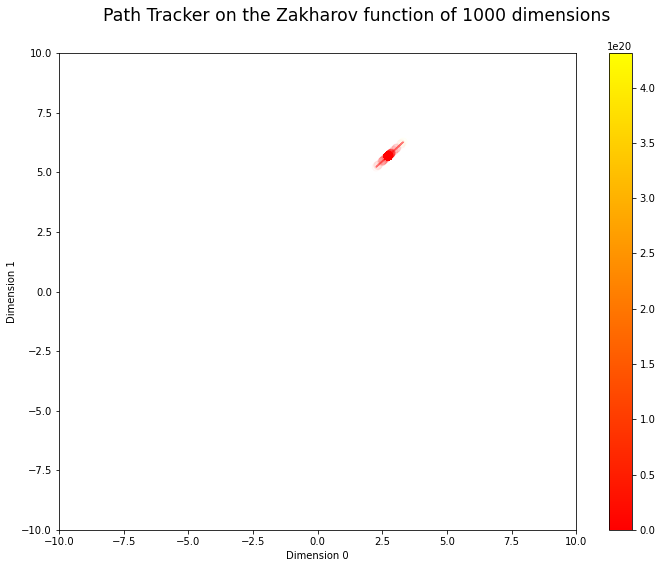

Minimum Delayed Loss: 8330392814.640388
Mean Delayed Loss: 8330394580.166288
Median Delayed Loss: 8330394580.166288


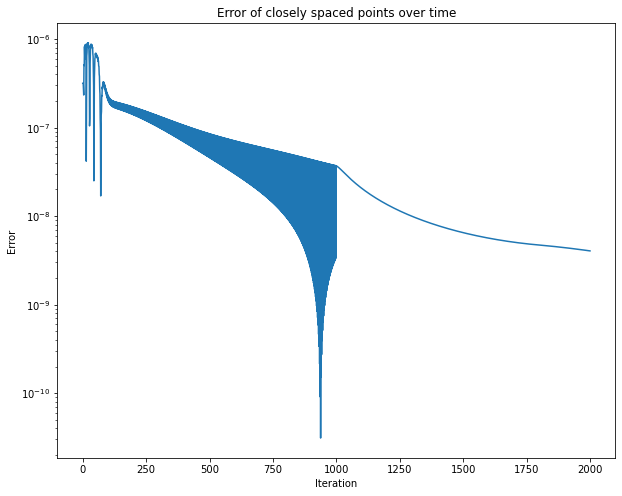

In [23]:
chaos_test(zak1000d)

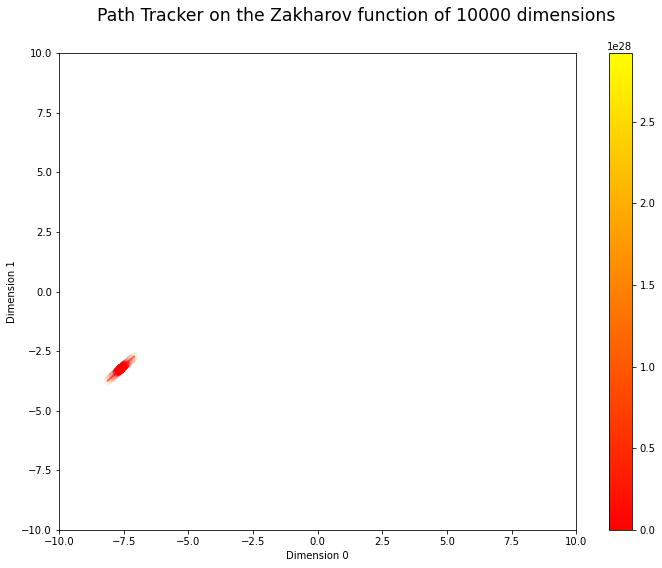

Minimum Delayed Loss: 2.177342031467887e+18
Mean Delayed Loss: 2.1773435957605276e+18
Median Delayed Loss: 2.1773435957605276e+18


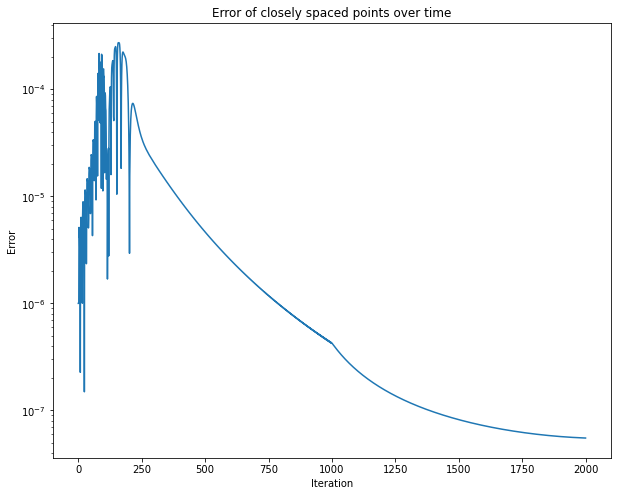

In [24]:
chaos_test(zak10000d)

# Scatterplot Convergence

In [5]:
zak2d.initialize_points(500, 'random')
zak2d.calculate_save_values('both', max_L=1, break_opt=True, save_grad=False, save_iters=True)

/home/cayjobla/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


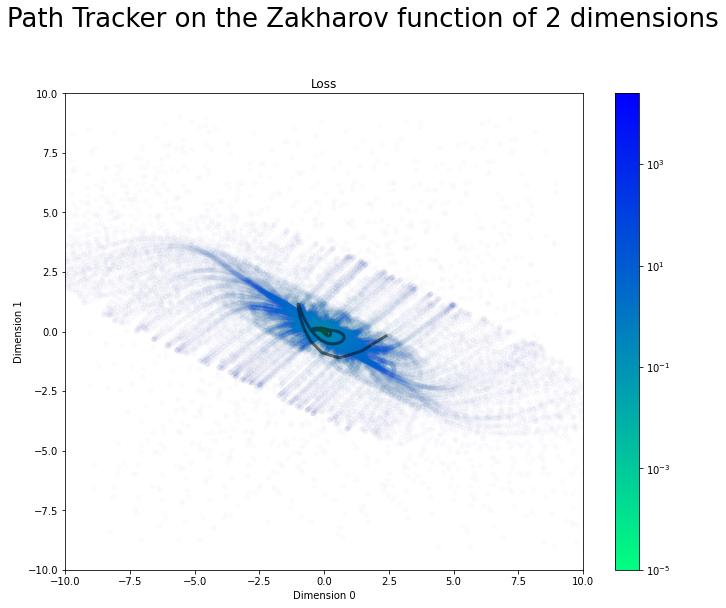

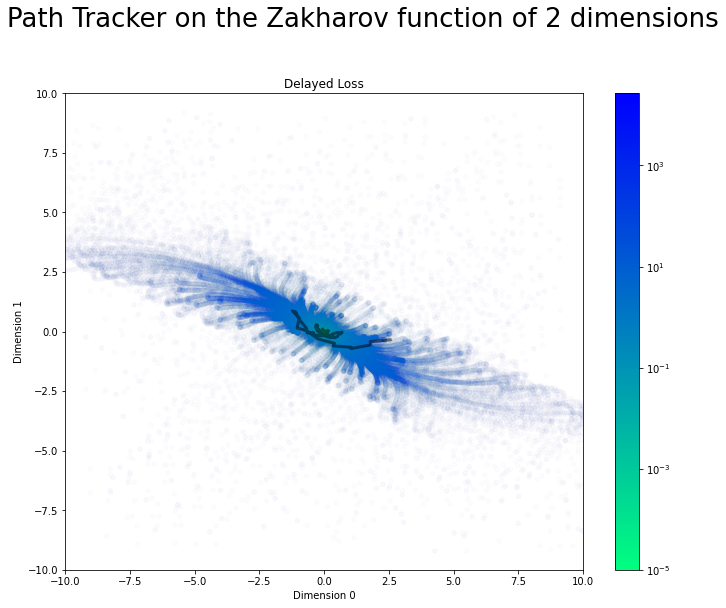

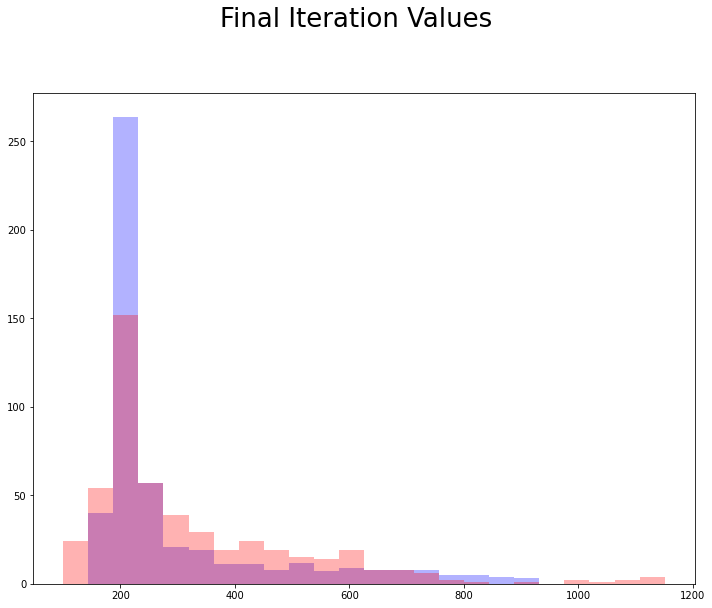

In [6]:
zak2d.plot_list([(False, 'path', 'loss'),(True, 'path', 'loss'),('both', 'finals', 'iters')], 
                time_plot=[0], cmap2='winter_r')

In [7]:
zak10d.initialize_points(500, 'random')
zak10d.calculate_save_values('both', max_L=1, break_opt=True, save_grad=False, save_iters=True)

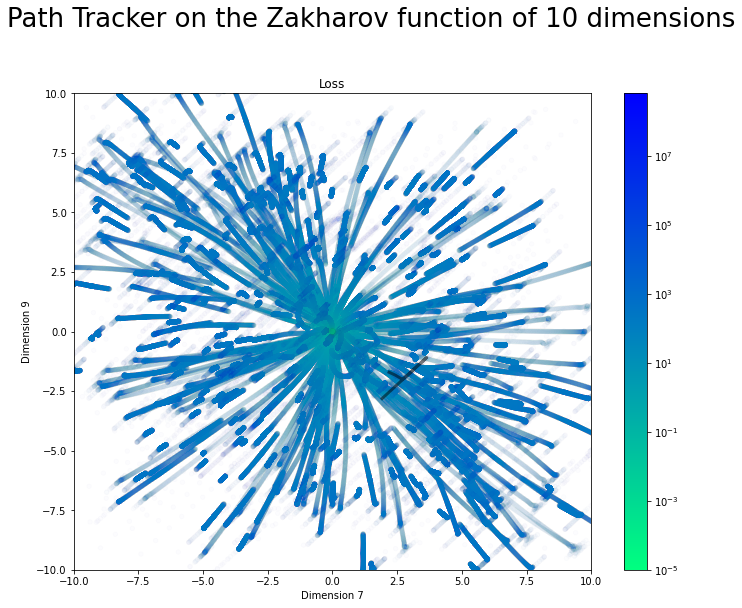

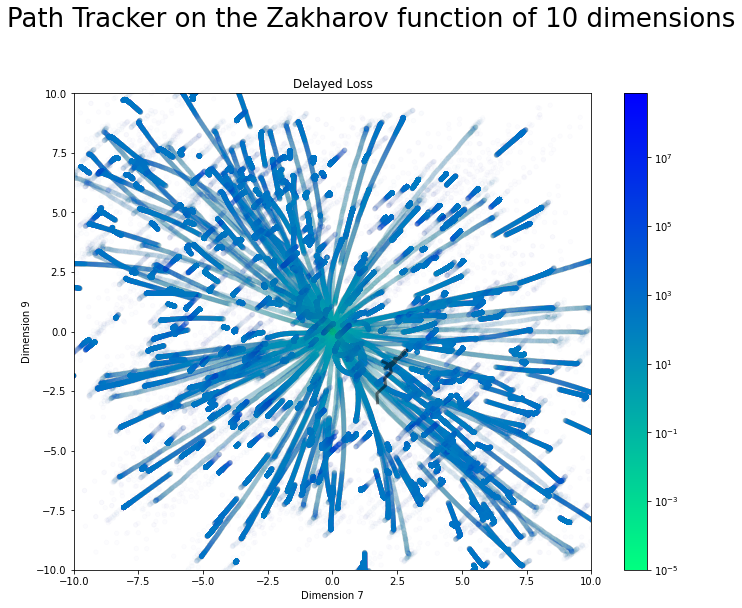

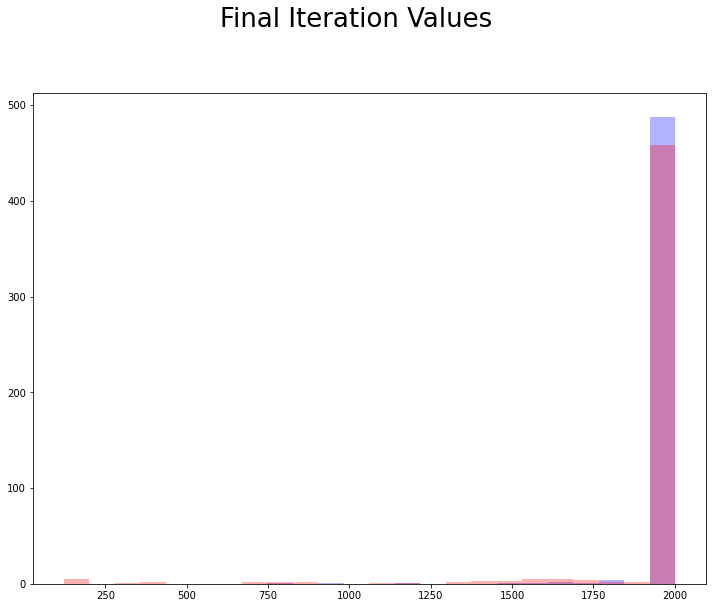

In [8]:
rand_dims = np.random.choice(np.arange(10), size=2, replace=False)
zak10d.plot_list([(False, 'path', 'loss'),(True, 'path', 'loss'),('both', 'finals', 'iters')], 
                 plot_dims=[rand_dims], time_plot=[0], cmap2='winter_r')

In [9]:
zak100d.initialize_points(500, 'random')
zak100d.calculate_save_values('both', max_L=1, break_opt=True, save_grad=False, save_iters=True)

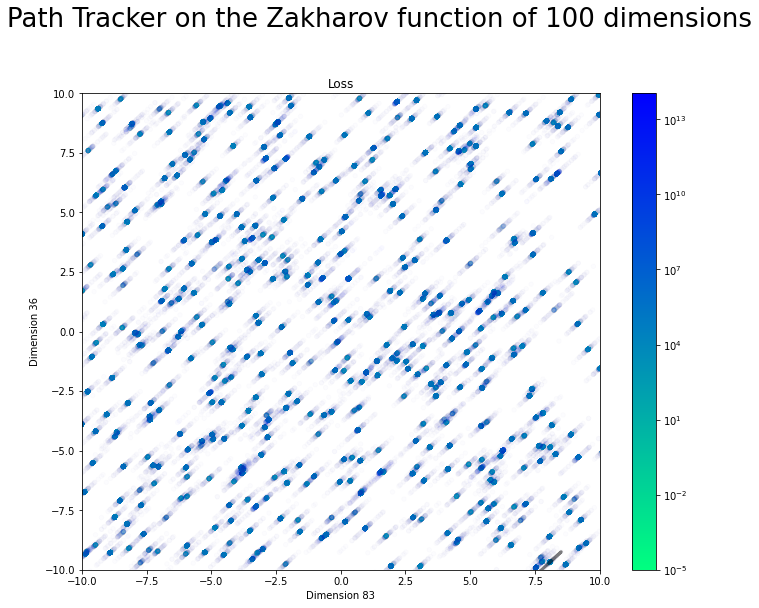

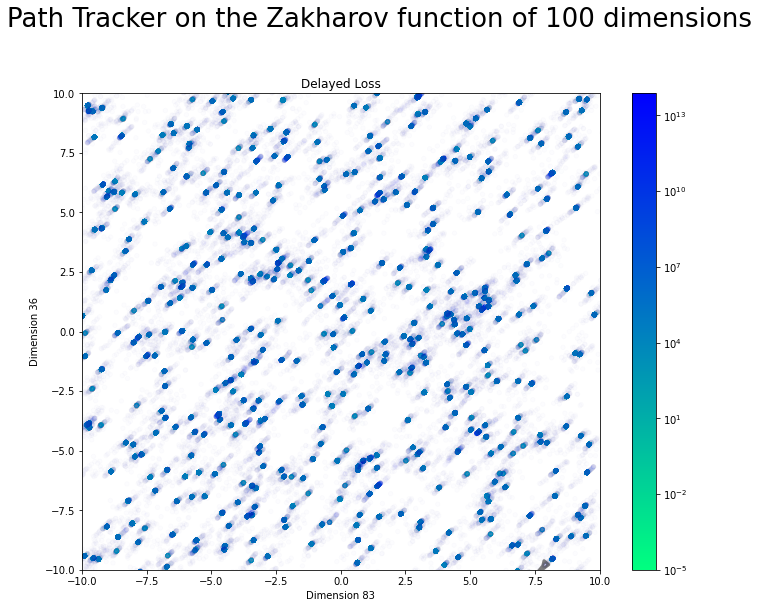

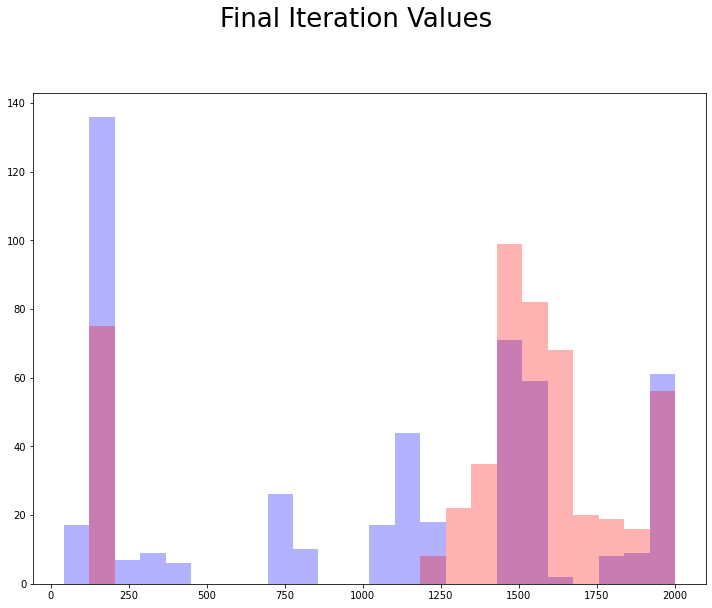

In [10]:
rand_dims = np.random.choice(np.arange(100), size=2, replace=False)
zak100d.plot_list([(False, 'path', 'loss'),(True, 'path', 'loss'),('both', 'finals', 'iters')], 
                  plot_dims=[rand_dims], time_plot=[0], cmap2='winter_r')

In [11]:
zak1000d.initialize_points(500, 'random')
zak1000d.calculate_save_values('both', max_L=1, break_opt=True, save_grad=False, save_iters=True)

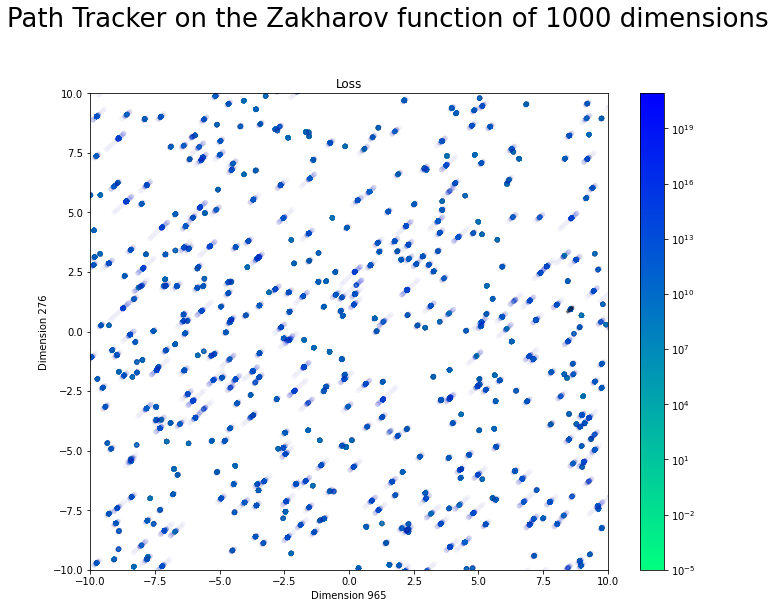

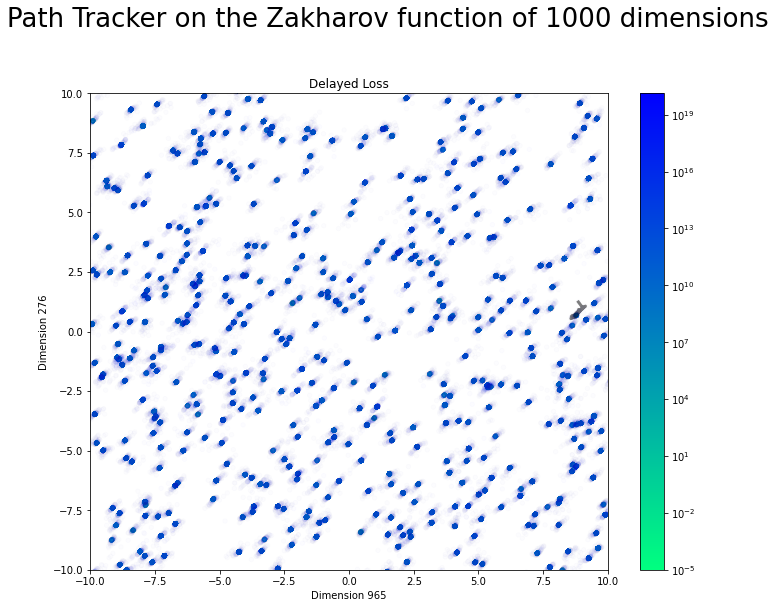

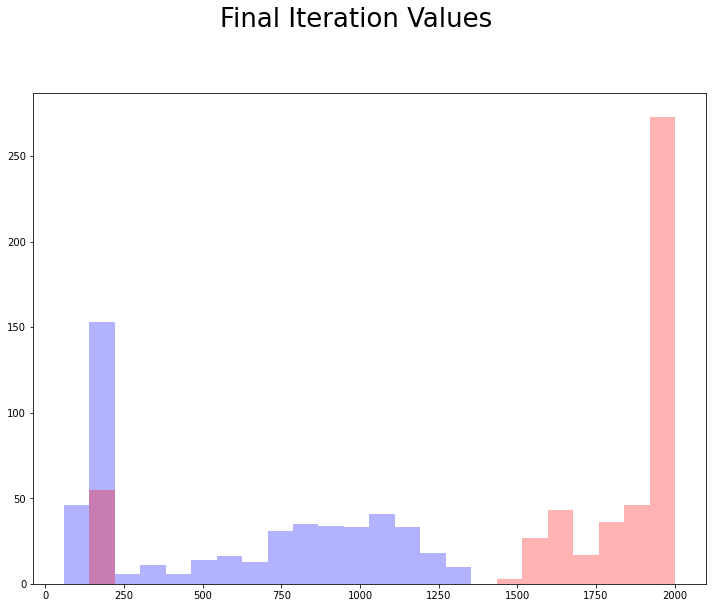

In [12]:
rand_dims = np.random.choice(np.arange(1000), size=2, replace=False)
zak1000d.plot_list([(False, 'path', 'loss'),(True, 'path', 'loss'),('both', 'finals', 'iters')], 
                    plot_dims=[rand_dims], time_plot=[0], cmap2='winter_r')

# Close Paths

In [48]:
def close_test(analyzer, num_points, given=None, delayed='both', eps=1e-5, max_L=1, num_delays=1000, D=None, random=False, time_plot=True):
    # Initialize
    n = analyzer.n
    low, high = analyzer.range_grid
    
    # Initialize Points
    if given is None:
        x_init = np.random.uniform(low, high, size=(num_points,n))
        x_init_err = np.random.randn(num_points,n)*eps + x_init
        x_inits = np.vstack((x_init, x_init_err))
    else:
        x_inits = given
    
    if D is None and random is False:
        D = [np.ones(n, dtype=int)]
    
    analyzer.optimize(1, 'given', delayed=delayed, plots=[[delayed, 'path', 'loss']], points=x_inits, 
                      max_L=max_L, D=D, random=random, time_plot=time_plot, clear_data=False, 
                      num_delays=num_delays, break_opt=False)
    
    return x_inits

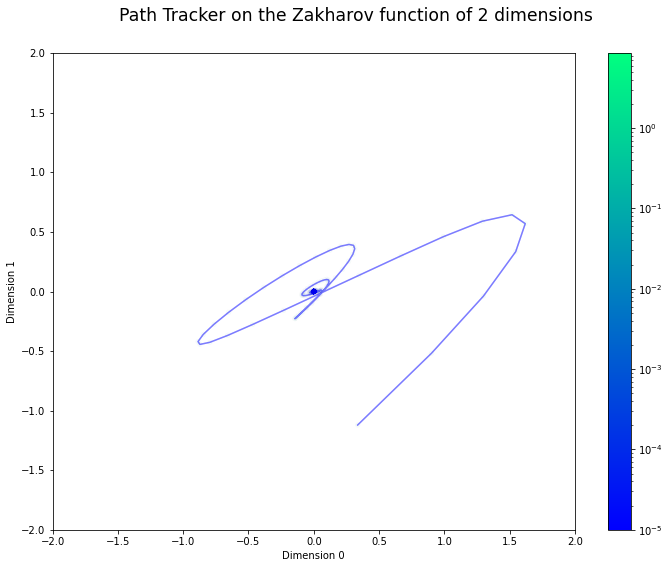

Minimum Loss: 6.609912936532396e-91
Mean Loss: 6.953515356481455e-91
Median Loss: 6.953515356481455e-91


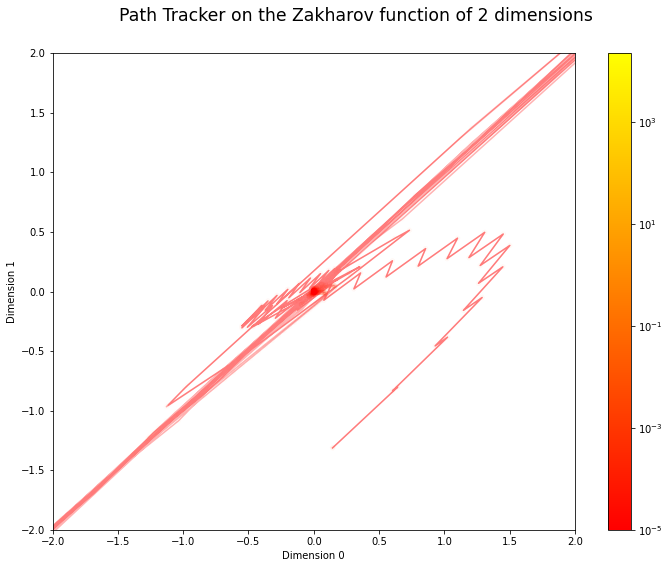

Minimum Delayed Loss: 2.652922128868975e-21
Mean Delayed Loss: 9.157886622792739e-19
Median Delayed Loss: 9.157886622792739e-19


array([[-0.43092721, -1.88735458],
       [-0.43095943, -1.88738527]])

In [49]:
zak2d.initialize_vars(range_grid=[-2.,2.])
x_inits = close_test(zak2d, 1, delayed=False)
close_test(zak2d, 1, x_inits, delayed=True)

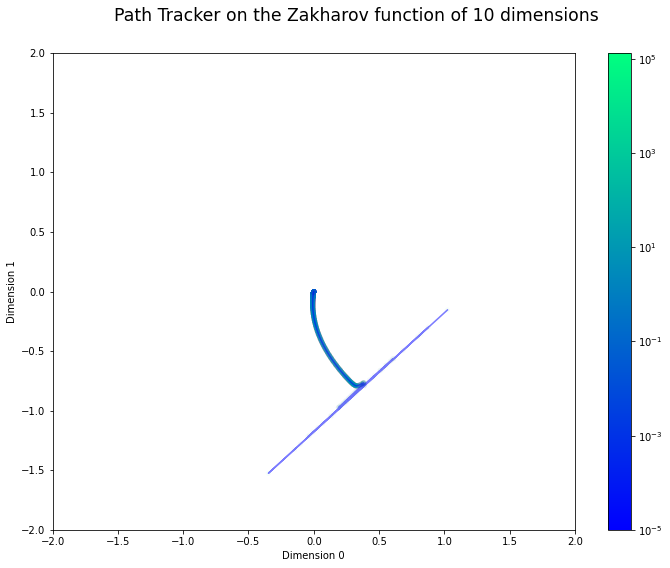

Minimum Loss: 0.03072456809421354
Mean Loss: 0.030725191036375422
Median Loss: 0.030725191036375422


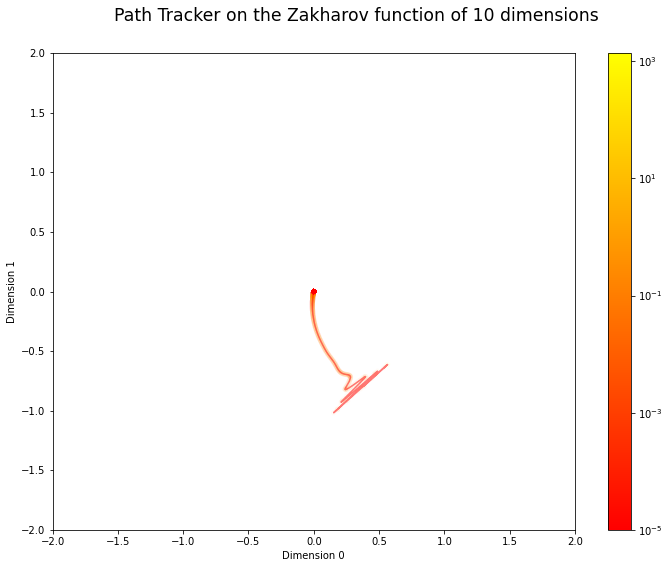

Minimum Delayed Loss: 2.002816812816867e-17
Mean Delayed Loss: 2.0029951385782287e-17
Median Delayed Loss: 2.0029951385782287e-17


array([[ 0.15318607, -1.02511024, -1.72356244,  0.62420741, -0.86386796,
        -1.34407239, -0.18475554,  0.5407821 ,  1.09186256, -0.65191892],
       [ 0.15317493, -1.02510858, -1.72356519,  0.6242016 , -0.86389027,
        -1.34407183, -0.18475525,  0.54078388,  1.09188064, -0.65191417]])

In [50]:
zak10d.initialize_vars(range_grid=[-2.,2.])
x_inits = close_test(zak10d, 1, delayed=False)
close_test(zak10d, 1, x_inits, delayed=True)

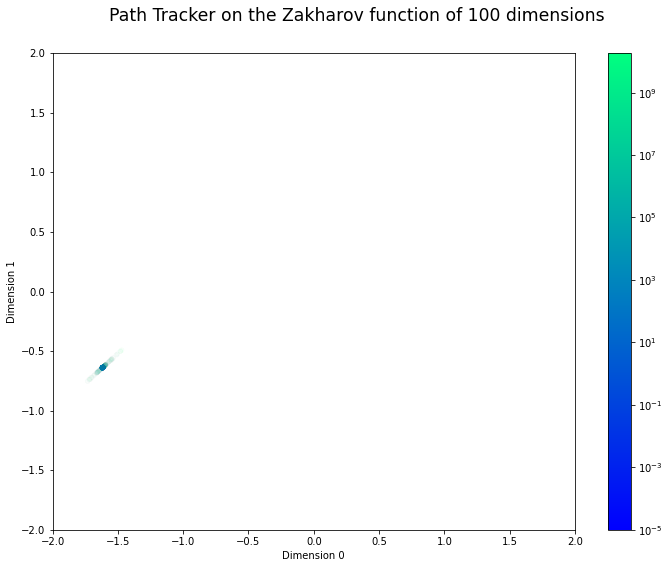

Minimum Loss: 131.92479772607948
Mean Loss: 131.92481144786035
Median Loss: 131.92481144786035


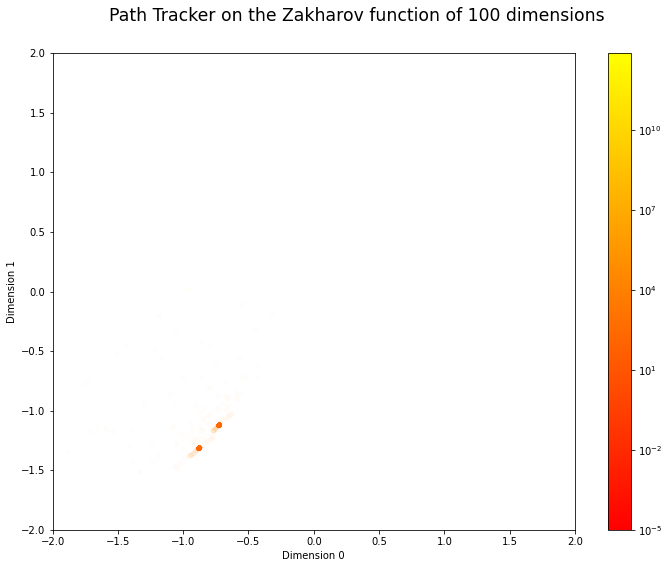

Minimum Delayed Loss: 161.61734060380343
Mean Delayed Loss: 168.28918569882248
Median Delayed Loss: 168.28918569882248


array([[-1.81589942, -0.8369432 ,  0.92096499, -1.13845323,  0.2947827 ,
        -1.4501425 ,  1.34303937,  0.11924629, -1.77073747,  1.73857598,
        -1.55098936, -0.02670932, -1.21065932, -0.50040329,  1.28969529,
        -1.74492801,  1.05298483, -1.40759499, -0.57927265, -1.80956987,
         0.54261779,  0.07450016, -1.36808103,  1.30677985,  1.18784827,
         1.82454944, -0.26500061,  1.35542764, -1.59298864,  1.01365321,
         0.5069269 ,  0.25873991, -0.44380803,  1.36335053,  1.16511267,
        -1.58220282,  1.10153484, -0.07921026,  0.29127689,  1.78334031,
        -1.15184911, -1.61496847, -0.18951905,  1.34935616, -1.3304405 ,
         0.17610191,  1.84904989,  1.71040374,  1.92930159, -1.31229312,
        -0.52917488, -0.84807595,  1.4667079 , -0.53446735, -1.08152151,
        -0.43578837, -0.56052975,  1.39856328, -1.25612317, -1.58001942,
         1.75618168, -0.78624572,  0.05375803,  1.1070692 ,  1.14421355,
        -1.6530888 ,  1.61159373, -0.61002204, -1.4

In [52]:
zak100d.initialize_vars(range_grid=[-2.,2.])
x_inits = close_test(zak100d, 1, delayed=False, time_plot=False)
close_test(zak100d, 1, x_inits, delayed=True, time_plot=False, random=True)